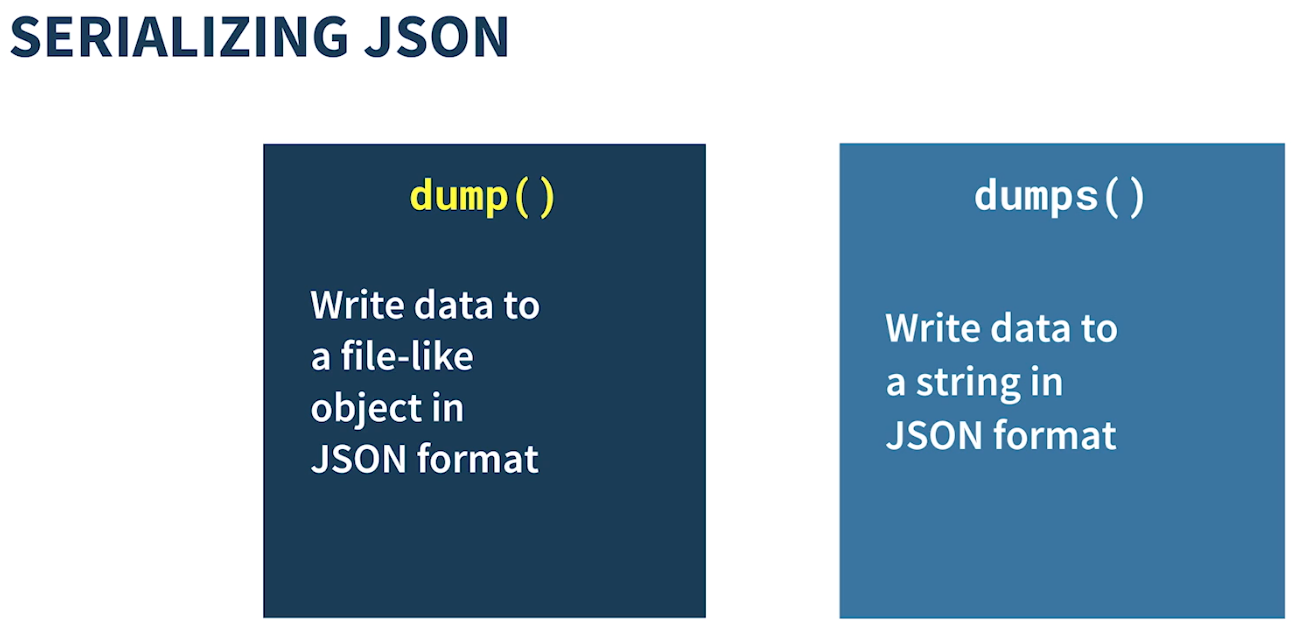

In [1]:
import json

## Serializing JSON Data

In [3]:
data = {
    "user":{
        "name": "Anne Bennet",
        "age": 55
    }
}

with open("data_file.json", "w") as write_file:
    json.dump(data, write_file, indent=2)

json_str = json.dumps(data, indent=2)
print(json_str)

{
  "user": {
    "name": "Anne Bennet",
    "age": 55
  }
}


## Deserializing JSON Data

In [5]:
json.loads(json_str)

{'user': {'name': 'Anne Bennet', 'age': 55}}

## Working With JSON Data in Python

In [9]:
import json
import requests

response = requests.get("https://jsonplaceholder.typicode.com/todos")
todos = json.loads(response.text)

todos_by_user = {}
for todo in todos:
    if todo['completed']:
        try:
            todos_by_user[todo["userId"]] += 1
        except KeyError:
            todos_by_user[todo["userId"]] = 1

top_users = sorted(todos_by_user.items(), key=lambda x: x[1], reverse=True)

max_complete = top_users[0][1]

users = []
for user, num_complete in top_users:
    if num_complete < max_complete:
        break
    users.append(str(user))

max_users = " and ".join(users)

print(f"user(s) {max_users} completed {max_complete} TODOs")

user(s) 5 and 10 completed 12 TODOs


In [14]:
def keep(todo):
    is_completed = todo["completed"]
    has_max_count = str(todo["userId"]) in users
    return is_completed and has_max_count

In [17]:
with open("filterd_data_file.json", "w") as data_file:
    filtered_todos = list(filter(keep, todos))
    json.dump(filtered_todos, data_file, indent=2)

## JSON for Custom Python Objects

In [18]:
import json

class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

In [19]:
json_str = json.dumps(Person("Will", 29))

TypeError: Object of type Person is not JSON serializable

## Encoding Custom Types to JSON

In [25]:
def complex_encoder(z):
    if isinstance(z, complex):
        return (z.real, z.imag)
    else:
        type_name = z.__class__.__name__
        raise TypeError(f"Object of type {type_name} is not serializable")
        
json_str = json.dumps(4+6j, default=complex_encoder)
json_str

'[4.0, 6.0]'

In [26]:
class ComplexEncoder(json.JSONEncoder):
    def default(self, z):
        if isinstance(z, complex):
            return (z.real, z.imag)
        else:
            return super().default(z)

json_str = json.dumps(4+6j, cls=ComplexEncoder)
json_str

'[4.0, 6.0]'

## Decoding Custom Types From JSON

In [27]:
def decode_complex(dct):
    if "__complex__" in dct:
        return complex(dct["real"], dct["imaginary"])
    else:
        return dct    

In [29]:
with open("complex_data.json") as complex_data:
    z = json.load(complex_data, object_hook=decode_complex)
    
print(type(z))
print(z)

<class 'complex'>
(42+36j)
